# Initialization

Connect to Google Drive:

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

In [3]:
X_train = X_train_tfidf
X_test = X_test_tfidf

# Basic training

We define the model and train it first

In [4]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Getting prediction on training set (without cross validation) then evaluate it!

Score of on train are:
	- Accuracy score: 0.8699
	- Micro F1 score: 0.8699
	- Macro F1 score: 0.8460
Score of on test are:
	- Accuracy score: 0.7738
	- Micro F1 score: 0.7738
	- Macro F1 score: 0.7434


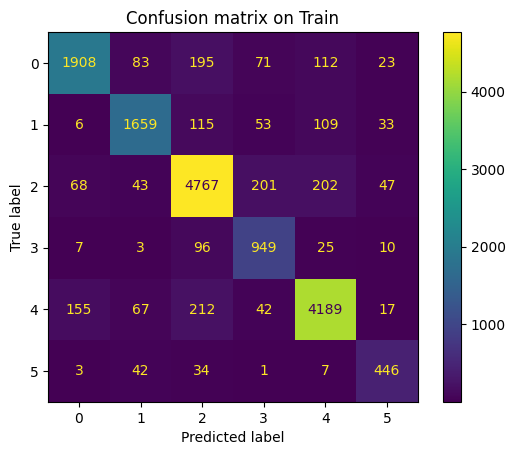

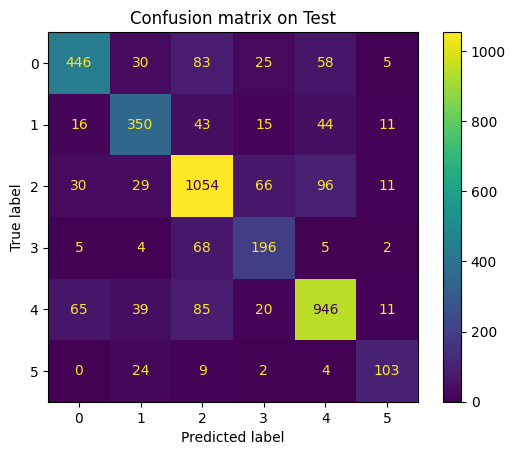

In [5]:
evaluate_model(knn_model, X_train, X_test, y_train, y_test, include_training = True)

Now we draw the plot for a range of k-neighbors

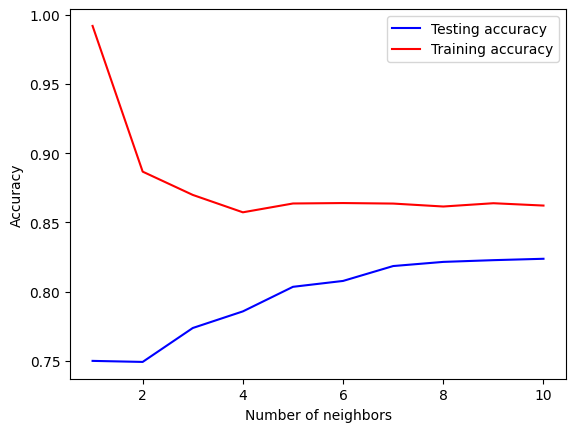

In [6]:
# Setting the hyperparameter range
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = list()
valid_accuracy_list = list()

for k in K:
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_train, y_train)

  data_pred_y = knn_model.predict(X_test)
  data_valid_y = knn_model.predict(X_train)

  accuracy_list.append([k, accuracy_score(y_test, data_pred_y)])
  valid_accuracy_list.append([k, accuracy_score(y_train, data_valid_y)])

accuracy_list = np.asarray(accuracy_list)
valid_accuracy_list = np.asarray(valid_accuracy_list)

plt.plot(accuracy_list[:, 0], accuracy_list[:, 1], label = "Testing accuracy", color = 'b')
plt.plot(valid_accuracy_list[:, 0], valid_accuracy_list[:, 1], label = "Training accuracy", color = 'r')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model evaluation: BoW - Normal Dataset

In [8]:
dict_param = {'n_neighbors': np.arange(1, 51),
              'p': np.arange(1, 3),
              'weights': ['uniform', 'distance']}
best_knn_model = GridSearchCV(KNeighborsClassifier(), param_grid = dict_param, n_jobs = 8, cv = 10, scoring = 'accuracy')

best_knn_model.fit(X_train, y_train)

print("Best parameters for k_NN on BoW - Normal Dataset:", best_knn_model.best_params_)

Best parameters for k_NN on BoW - Normal Dataset: {'n_neighbors': 24, 'p': 2, 'weights': 'uniform'}


Score of on train are:
	- Accuracy score: 0.8568
	- Micro F1 score: 0.8568
	- Macro F1 score: 0.8205
Score of on test are:
	- Accuracy score: 0.8395
	- Micro F1 score: 0.8395
	- Macro F1 score: 0.7993


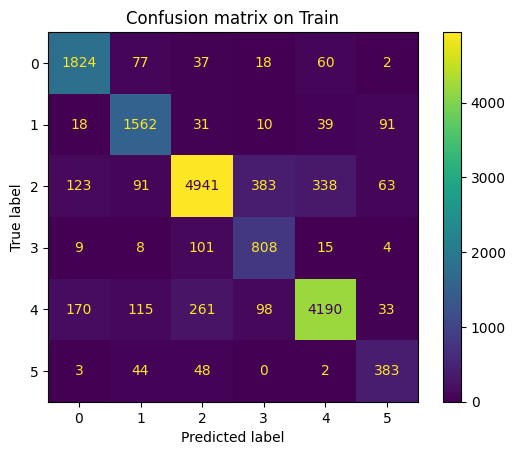

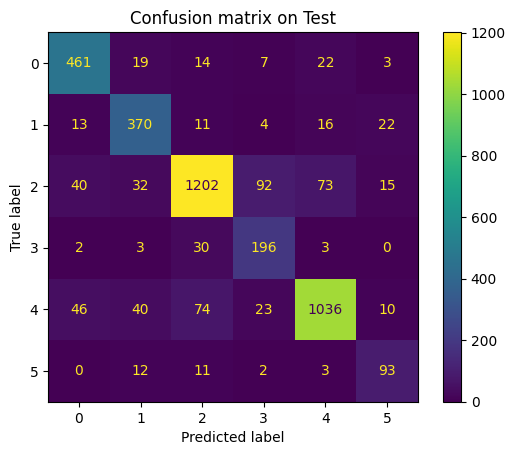

In [9]:
evaluate_model(best_knn_model, X_train, X_test, y_train, y_test, include_training=True)

# Export models

In [10]:
directory = "data/models/"

dump(best_knn_model, directory + "best_knn_model_tfidf_normal.joblib")

['data/models/best_knn_model_tfidf_normal.joblib']